# Water Purity Prediction

According to the World Health Organization(WHO), over 2 bilion people live without access to clean water. 



In [21]:
#importing relevant libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams

import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, train_test_split
from sklearn.metrics import precision_score, confusion_matrix
from sklearn import tree


In [22]:
#Importing dataset
df = pd.read_csv('water_potability.csv')


#produce a summary of the dataset.
df.head()
df.describe()
df.shape
df.info()
df["target"] = df.Potability
df.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,target
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,0



## Data Dictionary

| #   | Column           | Non-Null Count | Dtype    |
| --- | ------           | -------------- | -------- |
| 0   | ph               | 2785 non-null   | float64  |
| 1   | Hardness         | 3276 non-null   | float64  |
| 2   | Solids           | 3276 non-null   | float64  |
| 3   | Chloramines      | 3276 non-null   | float64  |
| 4   | Sulfate          | 2495 non-null   | float64  |
| 5   | Conductivity     | 3276 non-null   | float64  |
| 6   | Organic_carbon   | 3276 non-null   | float64  |
| 7   | Trihalomethanes  | 3114 non-null   | float64  |
| 8   | Turbidity        | 3276 non-null   | float64  |
| 9   | Potability       | 3276 non-null   | int64    |

The water_potability.csv file  record water quality metrics for 3276 different water bodies.   

 ph: pH is a crucial parameter in evaluating the acid–base balance and determining the acidic or alkaline condition of water. The WHO has set the max permissible limit of pH for safe drinking water from 6.5 to 8.5 The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

 Hardness: Hardness is mainly caused by calcium and magnesium salts which are dissolved from geologic deposits as water travels. The duration of contact between water and hardness-producing materials determines the level of hardness in raw water.

 Solids (Total dissolved solids - TDS): This refers to the minerals(organic or inorganic) or salts that can be dissolved in water. (Potassium, calcium, sodium, bicarbonates, chlorides, magnesium, and sulfates). These kinds of minerals can produce a unpleasant taste and diluted color in water. This is an important parameter for determining the drinkability of water for multiple reasons. The desirable limit is 500 mg/L. The maximum limit for drinking water is 1000 mg/L according to the WHO. 

Chloramines: These are used as disinfectants in public water systems, where are made by mixing ammonia to chlorine. The safe limit of Chlorine in drinking water is 4 miligrams per liter. 

Sulfate: Sulfrates are naturally occuring substances found in minerals, rocks, groundwater, food, soil, and plants. They are also used commercially in the chemical industry. For comparison, seawater contains about 2,700 mg/L, while freshwater have sulfate concentration of 3 to 30 mg/L(although in some freshwater geographic locations can have up to 1000 mg/L).

Conductivity: Conductivity measures the abiity for water to conduct an electrical current. This increases with an increase in ion concentration. It is influenced by the amount of dissolved solids present in the water sample. The electrical current standard, as stated by WHO, should not exceed 400 μS/cm.

Organic_carbon: Total Organic Carbon (TOC) in water may come from decaying natural organic matter or from a synthetic sources. TOC measures the total amount of carbon in organic compounds present in pure water. THe environmental Protection Agency recommends that drinking water should have less than 2 mg/L of TOC levels, while source water used for treatment should have TOC less than 4 mg/L. 

Trihalomethanes: THMs are chemicals that can be found in water treated with chlorine. The concentration of THMs in drinking water varies based on the level of organic maerial in the water, the amount of chlorine required for treatment, and water temperature. THM levels that are safe in drinking water are up to 80 ppm. 

Turbidity: This is a measure of light-emitting properties of water and depends on the amount of solid matter present in a suspended state. Te WHO reccommends turbidity to be at 5.00 NTU.

Potability: Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.


 

 
 

In [31]:
#Data Cleaning
df.isnull().sum()
# Drop rows with missing values
df.dropna(inplace=True)

# Count the number of duplicated rows
df.duplicated().sum()

# Drop duplicates
df.drop_duplicates(inplace=True)

# Calculate summary statistics for a column
column_stats = df['ph'].describe()
column_stats1 = df['Hardness'].describe()

print(column_stats1)
print(column_stats)

# # Calculate the interquartile range (IQR)
# IQR = column_stats['75%'] - column_stats['25%']

# # Calculate the upper and lower bounds for outliers
# upper_bound = column_stats['75%'] + 1.5 * IQR
# lower_bound = column_stats['25%'] - 1.5 * IQR

# # Find rows with outliers in the column
# outliers = df[(df['ph'] > upper_bound) | (df['ph'] < lower_bound)]

# # Drop rows with outliers
# df.drop(outliers.index, inplace=True)

# # Check the unique values in a column
# df['ph'].unique()

# # Replace inconsistent values with a standard value
# df['ph'].replace({'inconsistent_value': 'standard_value'}, inplace=True)


count    2011.000000
mean      195.968072
std        32.635085
min        73.492234
25%       176.744938
50%       197.191839
75%       216.441070
max       317.338124
Name: Hardness, dtype: float64
count    2011.000000
mean        7.085990
std         1.573337
min         0.227499
25%         6.089723
50%         7.027297
75%         8.052969
max        14.000000
Name: ph, dtype: float64


In [24]:
###Univariate Analysis
#Categorical
df.target.value_counts()
# df.target.value_counts(normalize = True)

0    1200
1     811
Name: target, dtype: int64

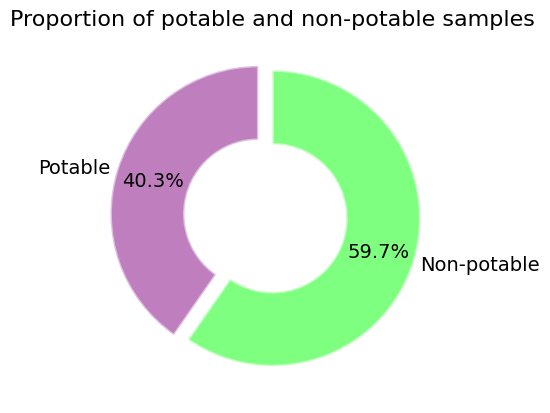

In [39]:
#Data Visualization 

explode = (0, 0.1) # Explode the second slice
labels = ['Non-potable', 'Potable'] # Add labels to the slices
colors = ['lime', 'purple']
# Use a custom colormap
cmap = plt.cm.Set2
wedgeprops = {'width': 0.5, 'edgecolor': 'w', 'linewidth': 2, 'alpha': 0.5}

plt.pie(df.target.value_counts(), explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, counterclock=False, wedgeprops=wedgeprops, textprops={'fontsize': 14}, pctdistance=0.75, labeldistance=1.05)
plt.title('Proportion of potable and non-potable samples', fontsize=16)
plt.show()




#Numerical Variables 
df.Solids.describe()
print(f"Skewness: {df['Solids'].skew()}")
print(f"Kurtisis: {df['Solids'].kurt()}")

#df.hist(column='Solids')
df.hist(column='Solids', bins = 30)

# Chloramines
df.Chloramines.describe()
print(f"Skewness: {df['Chloramines'].skew()}")
print(f"Kurtisis: {df['Chloramines'].kurt()}")

 
df.hist(column='Chloramines', bins = 30)

#Hardness
df.Hardness.describe()
print(f"Skewness: {df['Hardness'].skew()}")
print(f"Kurtisis: {df['Hardness'].kurt()}")


df.hist(column='Hardness', bins = 30)



NameError: name 'df' is not defined